In [1]:
import pandas as pd
import missingno as ms
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston_data = pd.read_csv("train.csv")

In [3]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [4]:
boston_data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [5]:
corr = boston_data.corr()
corr

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


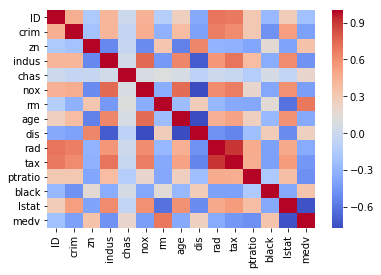

In [6]:
sns.heatmap(corr,cmap="coolwarm", xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [7]:
df1 = boston_data.drop('chas',axis = 1)
df1.drop('ID',axis = 1, inplace =True)

In [8]:
X = boston_data[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad','tax', 'ptratio', 'black', 'lstat']]
y = boston_data['medv']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 5)

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

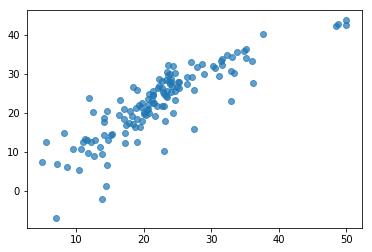

In [10]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions, alpha=0.7,)

In [11]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.47862673692344
MSE: 21.555343930949228
RMSE: 4.642773301696867


In [12]:
df2=pd.DataFrame(predictions,columns=['medv'])

df3=pd.DataFrame(boston_data['ID'],columns=['ID'])



result = pd.concat([df3,df2],axis=1)
result.head()

,ID,medv
0,1,24.790513
1,2,6.659737
2,4,24.469110
3,5,19.477849
4,7,23.231824


In [13]:
X = boston_data[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad','tax', 'ptratio', 'black', 'lstat']]
y = boston_data['medv']

lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
test_data = pd.read_csv('test.csv')

In [15]:
predictions = lm.predict(test_data[[ 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']])
predictions

array([30.93878331, 25.23819383, 18.51009054,  9.52466162, 18.00048098,
       16.66541997, 18.51296112, 15.25748172, 12.66370715, 15.08579269,
       19.42909136, 20.87135774,  7.05950177, 13.63389077, 23.91217069,
       22.25608887, 23.32823871, 28.44201191,  6.98777938, 27.81204014,
       21.01785483, 24.0585143 , 20.41962596, 21.72135445, 20.98899607,
       22.53374164, 26.08556785, 27.31398376, 29.55525355, 28.44164054,
       35.96199368, 35.46592871, 32.27016318, 21.37949309, 18.12950105,
       20.64946963, 20.36172641, 20.23099647, 19.90653272, 23.4106232 ,
       14.35502419, 20.80170921, 20.9107242 , 17.6789322 , 13.41640978,
       12.34676602,  8.59682361, 15.98399137, 19.23525756, 18.46587424,
       17.60890766, 34.36832359, 39.36004672, 26.76205072, 22.17375665,
       24.37345721, 32.35426118, 40.98241206, 35.68523299, 34.02343973,
       29.73082279, 36.99352623, 17.28254183, 13.27468838, 19.18633096,
       19.7837022 , 24.82986833, 28.8516478 , 22.0314146 , 27.39

In [16]:
df2=pd.DataFrame(predictions,columns=['medv'])

df3=pd.DataFrame(test_data['ID'],columns=['ID'])



result = pd.concat([df3,df2],axis=1)
result.head()

,ID,medv
0,3,30.938783
1,6,25.238194
2,8,18.510091
3,9,9.524662
4,10,18.000481


In [17]:
result.to_csv('result.csv',index=False)